# PERGUNTAS PARA A ANÁLISE(GPT)

1. "Com base em dados como idade, renda, escolaridade e outros fatores, é possível prever a classificação do crédito de uma pessoa?"<br>
→ Objetivo: Prever a variável Credit Score.<br>
→ Tipo: Classificação multiclasse (High, Medium, Low).<br><br>

2. "Pessoas casadas têm mais chances de ter crédito alto do que pessoas solteiras?"<br>
→ Objetivo: Avaliar a influência de Marital Status sobre o Credit Score.<br><br>

3. "O número de filhos afeta diretamente a pontuação de crédito de um indivíduo?"<br>
→ Objetivo: Entender se a feature Number of Children tem relevância na predição.<br><br>

4. "O tipo de moradia (própria ou alugada) impacta o score de crédito?"<br>
→ Objetivo: Avaliar a importância de Home Ownership na previsão de crédito.<br><br>

5. "Qual perfil tem maior chance de ter crédito alto: uma mulher jovem com ensino superior e renda média, ou um homem mais velho com ensino médio e alta renda?"<br>
→ Objetivo: Criar perfis simulados com base nas colunas Age, Gender, Income, Education, e ver o comportamento do modelo ao classificá-los.<br>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/Credit-Score.csv')

In [3]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


### Tratamento de dados

In [4]:
# Valores nulos
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [5]:
# Valores ausentes
df.isna().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [6]:
# Valores duplicados
df.duplicated().sum()

62

In [7]:
duplicadas = df[df.duplicated()]
print(duplicadas)

     Age  Gender  Income            Education Marital Status  \
73    27  Female   37500  High School Diploma         Single   
74    32    Male   57500   Associate's Degree         Single   
79    28  Female   32500   Associate's Degree         Single   
80    33    Male   52500  High School Diploma         Single   
81    38  Female   67500    Bachelor's Degree        Married   
..   ...     ...     ...                  ...            ...   
159   29  Female   27500  High School Diploma         Single   
160   34    Male   47500   Associate's Degree         Single   
161   39  Female   62500    Bachelor's Degree        Married   
162   44    Male   87500      Master's Degree         Single   
163   49  Female   77500            Doctorate        Married   

     Number of Children Home Ownership Credit Score  
73                    0         Rented          Low  
74                    0         Rented      Average  
79                    0         Rented          Low  
80             

In [8]:
# Verificando linhas duplicadas
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
29,25,Female,55000,Bachelor's Degree,Single,0,Rented,Average
135,25,Female,55000,Bachelor's Degree,Single,0,Rented,Average
58,25,Female,57500,Bachelor's Degree,Single,0,Rented,Average
90,25,Female,57500,Bachelor's Degree,Single,0,Rented,Average
122,25,Female,57500,Bachelor's Degree,Single,0,Rented,Average
...,...,...,...,...,...,...,...,...
146,51,Male,140000,Bachelor's Degree,Married,0,Owned,High
46,52,Male,130000,High School Diploma,Married,0,Owned,High
152,52,Male,130000,High School Diploma,Married,0,Owned,High
52,53,Male,122500,Associate's Degree,Married,0,Owned,High


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.dtypes

Age                    int64
Gender                object
Income                 int64
Education             object
Marital Status        object
Number of Children     int64
Home Ownership        object
Credit Score          object
dtype: object

In [12]:
print("Valore únicos nas colunas:")
for col in df.select_dtypes(include = 'object'):
    print(df[col].unique())

Valore únicos nas colunas:
['Female' 'Male']
["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]
['Single' 'Married']
['Rented' 'Owned']
['High' 'Average' 'Low']


## Pré processamento de dados

In [43]:
df.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

In [13]:
# Features(X)
x_credit = df.iloc[:, 0:7]
x_credit

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership
0,25,Female,50000,Bachelor's Degree,Single,0,Rented
1,30,Male,100000,Master's Degree,Married,2,Owned
2,35,Female,75000,Doctorate,Married,1,Owned
3,40,Male,125000,High School Diploma,Single,0,Owned
4,45,Female,100000,Bachelor's Degree,Married,3,Owned
...,...,...,...,...,...,...,...
130,31,Male,95000,Doctorate,Single,0,Rented
131,26,Female,55000,Bachelor's Degree,Married,1,Owned
132,32,Male,85000,Master's Degree,Single,0,Rented
133,29,Female,68000,Doctorate,Married,2,Owned


In [14]:
# Target(Y)
y_credit = df['Credit Score']
y_credit

0         High
1         High
2         High
3         High
4         High
        ...   
130       High
131    Average
132       High
133    Average
134       High
Name: Credit Score, Length: 102, dtype: object

In [15]:
y_credit.unique()

array(['High', 'Average', 'Low'], dtype=object)

Utilização do One Hot Encoder para o pré-processamento dos dados

In [16]:
from sklearn.model_selection import train_test_split
x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(x_credit, y_credit, test_size = 0.25, random_state = 0)

### Pré-processamento dos dados

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

OBS: O 'fit_transform' deve ser usado apenas nos dados de treino, para aprender os parâmetros dos dados e aplicar a transformação. Já o 'transform' usa a transformação já treinada e aplica os parâmetros, então deve ser usado nos dados de teste.

In [18]:
OHE_credit = ColumnTransformer(transformers = [('OneHot', OneHotEncoder(), [1, 3, 4, 6])], remainder = 'passthrough')
x_credit_treinamento = OHE_credit.fit_transform(x_credit_treinamento)
x_credit_teste = OHE_credit.transform(x_credit_teste)

In [20]:
# Salvando o pré-proessamento OHE
import pickle
with open('Pickle/OHE_credit.pkl', 'wb') as arquivo:
    pickle.dump(OHE_credit, arquivo)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
x_credit_treinamento = scaler_credit.fit_transform(x_credit_treinamento)
x_credit_teste = scaler_credit.transform(x_credit_teste)

In [22]:
# Salvando o escalonamento Scaler
with open('Pickle/scaler_credit.pkl', 'wb') as arquivo:
    pickle.dump(scaler_credit, arquivo)

In [23]:
from sklearn.preprocessing import LabelEncoder
LE_credit = LabelEncoder()
y_credit_treinamento = LE_credit.fit_transform(y_credit_treinamento)
y_credit_teste = LE_credit.transform(y_credit_teste)

In [24]:
with open('Pickle/LE_credit.pkl', 'wb') as arquivo:
    pickle.dump(LE_credit, arquivo)

In [25]:
x_credit_treinamento.shape, y_credit_treinamento.shape

((76, 14), (76,))

In [26]:
x_credit_teste.shape, y_credit_teste.shape

((26, 14), (26,))

In [27]:
import pickle
with open('Pickle/credit.pkl', mode = 'wb') as f:
    pickle.dump([x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste], f)

## Modelo Naive Bayes

In [28]:
import pickle
with open('Pickle/credit.pkl', mode = 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
naive_credit = GaussianNB()
naive_credit.fit(x_credit_treinamento, y_credit_treinamento)
previsao_credit = naive_credit.predict(x_credit_teste)

In [31]:
previsao_credit

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 0])

In [32]:
y_credit_teste

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 0])

In [33]:
from sklearn.metrics import accuracy_score, classification_report
# 100% de acerto
round(accuracy_score(y_credit_teste, previsao_credit), 2)

1.0

In [34]:
print(classification_report(y_credit_teste, previsao_credit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         2

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



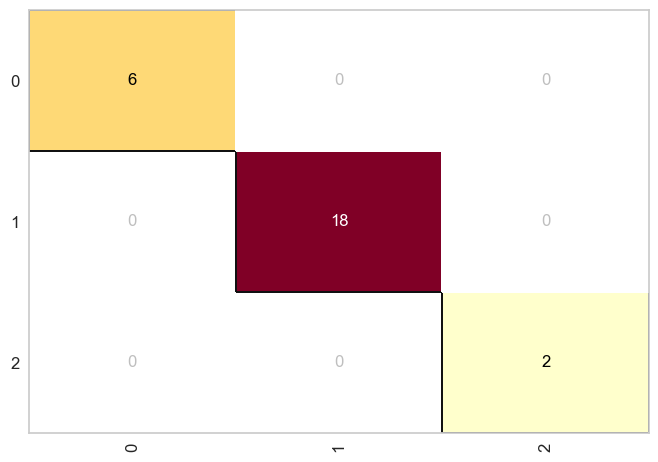

In [38]:
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt

cm = ConfusionMatrix(naive_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

plt.savefig('graphics/Matriz-Confusao_NB', dpi = 300, bbox_inches = 'tight')
plt.show()

In [36]:
import pickle
with open('Pickle/credit.pkl', mode = 'rb') as f:
    x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)
    
import numpy as np

In [37]:
np.bincount(y_credit_treinamento)

array([15, 57,  4], dtype=int64)

In [44]:
# Validação cruzada com 10 divisões diferentes de dados
from sklearn.model_selection import cross_val_score

scores = cross_val_score(naive_credit, OHE_credit.fit_transform(x_credit), LE_credit.fit_transform(y_credit), cv=10)

print(f"Desempenho do modelo em 10 divisões: {list(scores)}\n")
print(f"Média do desempenho do modelo: {scores.mean()}\n\n")

Desempenho do modelo em 10 divisões: [0.9090909090909091, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9]

Média do desempenho do modelo: 0.9809090909090911




C:\Users\joaop\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


In [54]:
# Salvando o modelo Naive Bayes
with open('Pickle/modelo_naive_credit.pkl', 'wb') as arquivo:
    pickle.dump(naive_credit, arquivo)

### Modelo Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
arvore_credit = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', random_state = 0)
arvore_credit.fit(x_credit_treinamento, y_credit_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [47]:
previsao_credit = arvore_credit.predict(x_credit_teste)

In [48]:
previsao_credit

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 0])

In [49]:
round(accuracy_score(y_credit_teste, previsao_credit), 2)

1.0

In [50]:
print(classification_report(y_credit_teste, previsao_credit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         2

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



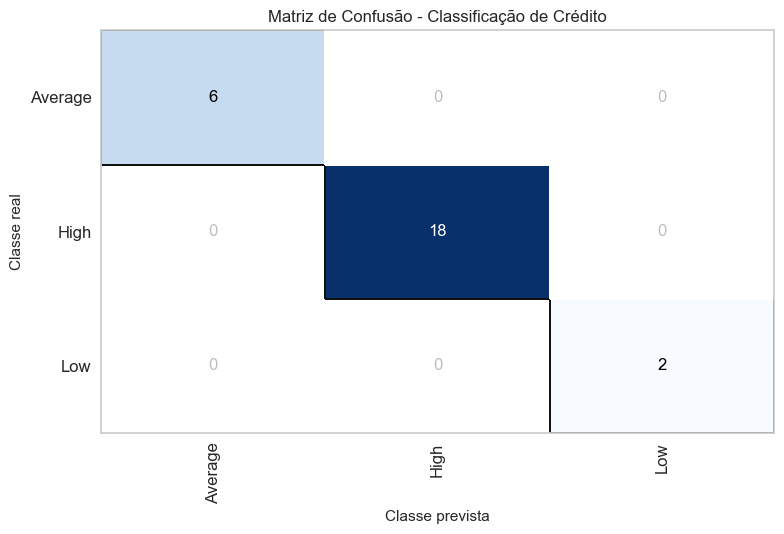

In [51]:
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt

# Carregando Label Encoder
with open('Pickle/LE_credit.pkl', 'rb') as arquivo:
    LE_credit = pickle.load(arquivo)

# Separando as classes
label = list(LE_credit.classes_)

# Criação do visualizer
cm = ConfusionMatrix(arvore_credit, classes = label, cmap='Blues')
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

# Personalização
cm.ax.set_title("Matriz de Confusão - Classificação de Crédito")
cm.ax.set_xlabel("Classe prevista")
cm.ax.set_ylabel("Classe real")

# Gráfico
plt.tight_layout()
plt.savefig('graphics/Matriz-Confusao', dpi = 300, bbox_inches = 'tight')
plt.show()

In [53]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(arvore_credit, OHE_credit.fit_transform(x_credit), LE_credit.fit_transform(y_credit), cv=10)

print(f"Desempenho do modelo em 10 divisões: {list(scores)}\n")
print(f"Média do desempenho do modelo: {scores.mean()}\n\n")

C:\Users\joaop\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


Desempenho do modelo em 10 divisões: [0.9090909090909091, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5]

Média do desempenho do modelo: 0.940909090909091




In [52]:
# Salvando o modelo
with open('Pickle/modelo_arvore_credit.pkl', 'wb') as arquivo:
    pickle.dump(arvore_credit, arquivo)

## Próximos passos

Plotar a importância das features (por exemplo: idade, escolaridade, etc.).

Criar visualizações para responder as perguntas preditivas.

Testar o modelo com perfis simulados, como você propôs:

. Mulher jovem com ensino superior e renda média.

. Homem mais velho com ensino médio e renda alta.

### Analisando a importância das features

In [5]:
# Carregando o modelo
with open('Pickle/modelo_arvore_credit.pkl', 'rb') as arquivo:
    arvore_credit = pickle.load(arquivo)

In [92]:
previsao_credit = arvore_credit.predict(x_credit_teste)
previsao_credit

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1])

In [93]:
# Importancia de cada coluna das features(x)
importances = arvore_credit.feature_importances_

Agora é preciso acessar o nome das colunas após o pré-processamento(One Hot Encoder) para analisar a importancia de cada uma.

In [94]:
# Pega todos os nomes das colunas one-hot codificadas
ohe = OHE_credit.named_transformers_['OneHot']
ohe_feature_names = ohe.get_feature_names_out(['Gender', 'Education', 'Marital Status', 'Home Ownership'])

O One Hot Encoder foi usado para transformar os dados categóricos, mas os dados numéricos como "Age", "Number of Children"..., não foram transformadas, mas sim mantidas com o parâmetro remainder='passthrough'.

E como o nome das colunas não ficam evidentes entre os dados categóricos transformados e os dados numéricos, é preciso juntar essas colunas em uma só.

In [95]:
# Junta com as colunas numéricas que não foram transformadas
final_feature_names = list(ohe_feature_names) + ['Age', 'Income', 'Number of Children']

Após a junção dessas colunas, é preciso criar um Data frame com o nome das features e a importancia das features, para que possam ser analisados em grafico

In [96]:
# Criação do data frame para análise da importância das features
df_importances = pd.DataFrame({
    'Features': final_feature_names,
    'Importances': importances
})

# Ordenando os mais importante para os menos
df_importances.sort_values(by = 'Importances', ascending = False)

,Features,Importances
12,Income,0.270197
11,Age,0.212447
10,Home Ownership_Rented,0.175387
9,Home Ownership_Owned,0.123362
7,Marital Status_Married,0.039778
8,Marital Status_Single,0.034805
0,Gender_Female,0.030051
3,Education_Bachelor's Degree,0.025608
5,Education_High School Diploma,0.023281
13,Number of Children,0.021004


In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

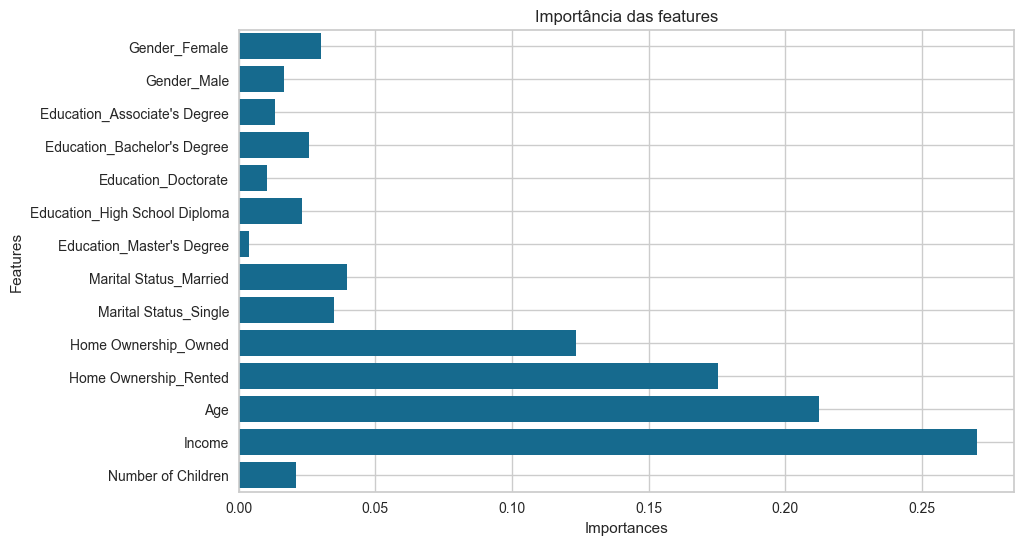

In [98]:
plt.figure(figsize=(10, 6))

sns.barplot(data = df_importances, x = df_importances['Importances'], y = df_importances['Features']).set(title = 'Importância das features')

plt.grid(True)

plt.savefig('graphics/importância-das-features.png', dpi = 300, bbox_inches = 'tight')

## Respondendo primeira pergunta
1. "Com base em dados como idade, renda, escolaridade e outros fatores, é possível prever a classificação do crédito de uma pessoa?"

Para responder essa pergunta, será feita uma simulação de um novo registro, com os dados necessários para fazer a previsão.

In [99]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [100]:
# Simulação de um novo registro
pessoa1 = pd.DataFrame([{
    "Age": 30,
    "Gender": "Male",
    "Income": 5000,
    "Education": "Bachelor's Degree",
    "Marital Status": "Single",
    "Number of Children": 0,
    "Home Ownership": "Rented",
}])
pessoa1

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership
0,30,Male,5000,Bachelor's Degree,Single,0,Rented


Assim como no modelo, é preciso fazer o pré-processamento desses dados para que o modelo possa reconhecer

In [36]:
# Carregando o encoder e o scaler
import pickle
with open('Pickle/OHE_credit.pkl', 'rb') as arquivo:
    OHE_credit = pickle.load(arquivo)

In [37]:
with open('Pickle/scaler_credit.pkl', 'rb') as arquivo:
    scaler_credit = pickle.load(arquivo)

OBS: Para os novos dados que serão usados para previsão, não deve-se usar o "fit_transform" como no treinamento para o pré-processamento, mas sim o "transform"

In [103]:
# Fazendo o pré-processamento
pessoa1 = OHE_credit.transform(pessoa1)
pessoa1 = scaler_credit.transform(pessoa1)
pessoa1

array([[-0.97590007,  0.97590007, -0.47958315,  1.72271354, -0.45374261,
        -0.49236596, -0.49236596, -0.97590007,  0.97590007, -1.36398868,
         1.36398868, -0.93541364, -2.30517889, -0.64467125]])

Agora que o registro foi pré-processado, já é possível realizar a previsão com o modelo

In [104]:
# Carregando o modelo
with open('Pickle/modelo_arvore_credit.pkl', 'rb') as arquivo:
    arvore_credit = pickle.load(arquivo)

In [106]:
previsao = arvore_credit.predict(pessoa1)
previsao

array([0])

In [113]:
print(LE_credit.classes_)

['Average' 'High' 'Low']


In [114]:
for codigo, classe in enumerate(LE_credit.classes_):
    print(f"{codigo} → {classe}")

0 → Average
1 → High
2 → Low


Como é possível ver, a previsão da pessoa1 classificou o crédito com 0, ou seja, chance média ou 'Average', mas para melhorar a resposta é preciso decodificar o Label Encoder com 'inverse_transform'

In [115]:
with open('Pickle/LE_credit.pkl', 'rb') as arquivo:
    LE_credit = pickle.load(arquivo)

# Decodificando os rótulos do Label Encoder
resultado = LE_credit.inverse_transform(previsao)

In [116]:
print(f"Classificação de crédito prevista da pessoa 1: {resultado[0]}")

Classificação de crédito prevista da pessoa 1: Average


### Respondendo a primeira pergunta
Sim, como é possível ver, o modelo conseguiu prever a classificação do crédito de uma pessoa, com uma acurácia de 95% aproximadamente.

## Segunda pergunta
2. "Pessoas casadas têm mais chances de ter crédito alto do que pessoas solteiras?"

Para verificar essa informação, é preciso simular duas pessoas que tem condições iguais, como idade, salário e etc. Mas com a diferença de que a primeira pessoa será solteira e a outra será casada, para verificar se isso irá alterar as classificações

In [39]:
# Pessoa solteira
solteiro = pd.DataFrame([{
    "Age": 30,
    "Gender": "Male",
    "Income": 5000,
    "Education": "Bachelor's Degree",
    "Marital Status": "Single",
    "Number of Children": 0,
    "Home Ownership": "Rented",
}])

# Pessoa casada
casado = pd.DataFrame([{
    "Age": 30,
    "Gender": "Male",
    "Income": 5000,
    "Education": "Bachelor's Degree",
    "Marital Status": "Married",
    "Number of Children": 0,
    "Home Ownership": "Rented",
}])

In [40]:
# Pré-processamento dos dados
solteiro = OHE_credit.transform(solteiro)
solteiro = scaler_credit.transform(solteiro)
solteiro

array([[-0.97590007,  0.97590007, -0.47958315,  1.72271354, -0.45374261,
        -0.49236596, -0.49236596, -0.97590007,  0.97590007, -1.36398868,
         1.36398868, -0.93541364, -2.30517889, -0.64467125]])

In [41]:
casado = OHE_credit.transform(casado)
casado = scaler_credit.transform(casado)
casado

array([[-0.97590007,  0.97590007, -0.47958315,  1.72271354, -0.45374261,
        -0.49236596, -0.49236596,  1.02469508, -1.02469508, -1.36398868,
         1.36398868, -0.93541364, -2.30517889, -0.64467125]])

In [42]:
previsao_solteiro = arvore_credit.predict(solteiro)
previsao_solteiro

array([0])

In [43]:
previsao_casado = arvore_credit.predict(casado)
previsao_casado

array([0])

In [44]:
with open('Pickle/LE_credit.pkl', 'rb') as arquivo:
    LE_credit = pickle.load(arquivo)

# Decodificando os rótulos do Label Encoder
resultado_solteiro = LE_credit.inverse_transform(previsao_solteiro)
resultado_casado = LE_credit.inverse_transform(previsao_casado)

print(f"Classificação de crédito prevista da pessoa solteira: {resultado_solteiro[0]}")
print(f"Classificação de crédito prevista da pessoa casada: {resultado_casado[0]}")

Classificação de crédito prevista da pessoa solteira: Average
Classificação de crédito prevista da pessoa casada: Average


### Respondendo segunda pergunta
Nesse caso, onde foram comparados duas pessoas com condições identicas e com apenas o estado civíl alterado, o fato de uma pessoa ser casada não se torna um fator determinante para ter um crédito mais alto, de acordo com o modelo treinado. Porém, pode ser que outros fatores como renda, escolaridade ou número de filhos possam ter um peso maior nessa análise, mas o estado civíl não.

## Terceira pergunta

3. "O número de filhos afeta diretamente a pontuação de crédito de um indivíduo?"
   
→ Objetivo: Entender se a feature Number of Children tem relevância na predição.

Para verificar se o número de filhos tem um impacto no crédito, será feita a mesma coisa que a pergunta anterior, usar dois indivíduos com condições iguais, apenas com a diferença de que um terá filhos e o outro nenhum, para verificar o peso dessa variável.

In [6]:
# Carregamento do modelo e encoders
import pickle
with open('Pickle/modelo_arvore_credit.pkl', 'rb') as arquivo:
    arvore_credit = pickle.load(arquivo)

with open('Pickle/OHE_credit.pkl', 'rb') as arquivo:
    OHE_credit = pickle.load(arquivo)

with open('Pickle/LE_credit.pkl', 'rb') as arquivo:
    LE_credit = pickle.load(arquivo)

with open('Pickle/scaler_credit.pkl', 'rb') as arquivo:
    scaler_credit = pickle.load(arquivo)

In [11]:
# Trabalhadora sem filho
trabalhadora1 = pd.DataFrame([{
    "Age": 30,
    "Gender": "Female",
    "Income": 4000,
    "Education": "Bachelor's Degree",
    "Marital Status": "Single",
    "Number of Children": 0,
    "Home Ownership": "Rented",
}])

# Trabalhadora com filhos
trabalhadora2 = pd.DataFrame([{
    "Age": 30,
    "Gender": "Female",
    "Income": 4000,
    "Education": "Bachelor's Degree",
    "Marital Status": "Married",
    "Number of Children": 2,
    "Home Ownership": "Rented",
}])

In [12]:
# Pré-processamento
trabalhadora1 = OHE_credit.transform(trabalhadora1)
trabalhadora1 = scaler_credit.transform(trabalhadora1)
trabalhadora1

array([[ 1.02469508, -1.02469508, -0.47958315,  1.72271354, -0.45374261,
        -0.49236596, -0.49236596, -0.97590007,  0.97590007, -1.36398868,
         1.36398868, -0.93541364, -2.33443364, -0.64467125]])

In [13]:
trabalhadora2 = OHE_credit.transform(trabalhadora2)
trabalhadora2 = scaler_credit.transform(trabalhadora2)
trabalhadora2

array([[ 1.02469508, -1.02469508, -0.47958315,  1.72271354, -0.45374261,
        -0.49236596, -0.49236596,  1.02469508, -1.02469508, -1.36398868,
         1.36398868, -0.93541364, -2.33443364,  1.79516149]])

In [17]:
# Previsão de classes
previsao_trab1 = arvore_credit.predict(trabalhadora1)
previsao_trab2 = arvore_credit.predict(trabalhadora2)

# Decodificação
resultado1 = LE_credit.inverse_transform(previsao_trab1)
resultado2 = LE_credit.inverse_transform(previsao_trab2)

# Resultado
print(f'Previsão de crédito da trabalhadora 1: {resultado1[0]}')
print(f'Previsão de crédito da trabalhadora 2: {resultado2[0]}')

Previsão de crédito da trabalhadora 1: Low
Previsão de crédito da trabalhadora 2: High


### Respondendo a terceira pergunta
Como é possível ver no resultado, a comparação entre duas trabalhadoras com condições semelhantes, mas com a diferença de uma possuir filhos e a outra não, resultou em uma diferença de crédito grande, a trabalhadora sem filhos tem pontuação de crédito baixa, ou seja, ela tem mais chances de não pagar suas dívidas, enquanto a trabalhadora que possui filhos, teve uma pontuação de crédito alta, o que significa que ela tem mais chances de pagar suas dívidas, o que indica que a trabalhadora casada que tem filhos tem mais estabilidade financeira e maior responsabilidade em pagar o que deve, de acordo com a previsão do modelo treinado.

## Quarta pergunta
4. "O tipo de moradia (própria ou alugada) impacta o score de crédito?"

→ Objetivo: Avaliar a importância de Home Ownership na previsão de crédito.

Para responder essa pergunta, será usada a mesma estratégia que as perguntas anteriores, comparar duas pessoas com condições identicas, com a única diferença o tipo de moradia dessa vez, para verificar o peso dessa vairável na predição.

In [4]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [1]:
# Importando o modelo e encoders
import pickle
with open('Pickle/modelo_arvore_credit.pkl', 'rb') as arquivo:
    arvore_credit = pickle.load(arquivo)

with open('Pickle/OHE_credit.pkl', 'rb') as arquivo:
    OHE_credit = pickle.load(arquivo)

with open('Pickle/scaler_credit.pkl', 'rb') as arquivo:
    scaler_credit = pickle.load(arquivo)

with open('Pickle/LE_credit.pkl', 'rb') as arquivo:
    LE_credit = pickle.load(arquivo)

In [5]:
# Morador de aluguel
morador_aluguel = pd.DataFrame([{
    "Age": 25,
    "Gender": "Male",
    "Income": 4000,
    "Education": "Bachelor's Degree",
    "Marital Status": "Single",
    "Number of Children": 0,
    "Home Ownership": "Rented"
}])

# Morador com casa própria
morador_cp = pd.DataFrame([{
    "Age": 25,
    "Gender": "Male",
    "Income": 4000,
    "Education": "Bachelor's Degree",
    "Marital Status": "Single",
    "Number of Children": 0,
    "Home Ownership": "Owned"
}])

In [6]:
# Pré-processamento dos dados
morador_aluguel = OHE_credit.transform(morador_aluguel)
morador_aluguel = scaler_credit.transform(morador_aluguel)
morador_aluguel

array([[-0.97590007,  0.97590007, -0.47958315,  1.72271354, -0.45374261,
        -0.49236596, -0.49236596, -0.97590007,  0.97590007, -1.36398868,
         1.36398868, -1.5118459 , -2.33443364, -0.64467125]])

In [7]:
morador_cp = OHE_credit.transform(morador_cp)
morador_cp = scaler_credit.transform(morador_cp)
morador_cp

array([[-0.97590007,  0.97590007, -0.47958315,  1.72271354, -0.45374261,
        -0.49236596, -0.49236596, -0.97590007,  0.97590007,  0.73314391,
        -0.73314391, -1.5118459 , -2.33443364, -0.64467125]])

In [8]:
# Previsão
previsao_aluguel = arvore_credit.predict(morador_aluguel)
previsao_cp = arvore_credit.predict(morador_cp)

# Decodificação
resultado_aluguel = LE_credit.inverse_transform(previsao_aluguel)
resultado_cp = LE_credit.inverse_transform(previsao_cp)

# Resultado
print(f"Classificação de crédito do morador de aluguel: {resultado_aluguel[0]}")
print(f"Classificação de crédito do morador de casa própria: {resultado_cp[0]}")

Classificação de crédito do morador de aluguel: Average
Classificação de crédito do morador de casa própria: High


### Respondendo a quarta pergunta
Nesse caso, o modelo preveu que a classificação de crédito do morador de casa própria é alta, enquanto a do morador de aluguel é média. Ou seja, isso significa que o morador de casa própria é mais propenso a pagar suas dívidas do que o morador de aluguel, que pelo fato de não ter uma casa própria, pode indicar uma tendência a ter dificuldades financeiras e consequentemente ter mais chances de não pagar dívidas nesse caso em específico, porém isso não é uma regra geral e o resultado pode mudar conforme as mudanças das variáveis.

## Outra opção
- Comparar uma pessoa de baixa renda mas com casa própria e outra com alta renda e casa alugada

In [9]:
# Morador de aluguel
morador_aluguel = pd.DataFrame([{
    "Age": 25,
    "Gender": "Male",
    "Income": 10000,
    "Education": "Bachelor's Degree",
    "Marital Status": "Single",
    "Number of Children": 0,
    "Home Ownership": "Rented"
}])

# Morador com casa própria
morador_cp = pd.DataFrame([{
    "Age": 25,
    "Gender": "Male",
    "Income": 3000,
    "Education": "Bachelor's Degree",
    "Marital Status": "Single",
    "Number of Children": 0,
    "Home Ownership": "Owned"
}])

In [10]:
# Pré-processamento dos dados
morador_aluguel = OHE_credit.transform(morador_aluguel)
morador_aluguel = scaler_credit.transform(morador_aluguel)

morador_cp = OHE_credit.transform(morador_cp)
morador_cp = scaler_credit.transform(morador_cp)

In [11]:
# Previsão
previsao_aluguel = arvore_credit.predict(morador_aluguel)
previsao_cp = arvore_credit.predict(morador_cp)

# Decodificação
resultado_aluguel = LE_credit.inverse_transform(previsao_aluguel)
resultado_cp = LE_credit.inverse_transform(previsao_cp)

# Resultado
print(f"Classificação de crédito do morador de aluguel(renda alta): {resultado_aluguel[0]}")
print(f"Classificação de crédito do morador de casa própria(renda baixa): {resultado_cp[0]}")

Classificação de crédito do morador de aluguel(renda alta): Average
Classificação de crédito do morador de casa própria(renda baixa): High


### OBS
É possível notar que mesmo que o morador de aluguel tenha um salário alto e o morador de casa própria tenha baixa renda, ainda sim o resultado foi o mesmo, com o morador de casa própria tendo mais chances de pagar suas dívidas do que o morador de aluguel. Porém, mesmo que isso pareça contraditório, a razão por esse resultado ser assim pode indicar um peso maior na variável de tipo de moradia, ou seja, o modelo interpreta que mesmo que o morador de casa própria tenha uma renda baixa, ele tem maior estabilidade financeira, porém isso não significa necessariamente que há uma inconsistência na previsão, mas sim que o algoritmo aprendeu com o padrão real que os dados originais concederam.

## Quinta pergunta
5. "Qual perfil tem maior chance de ter crédito alto: uma mulher jovem com ensino superior e renda média, ou um homem mais velho com ensino médio e alta renda?"

→ Objetivo: Criar perfis simulados com base nas colunas Age, Gender, Income, Education, e ver o comportamento do modelo ao classificá-los.

In [8]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [3]:
# Importando o modelo e encoders
import pickle
with open('Pickle/modelo_arvore_credit.pkl', 'rb') as arquivo:
    arvore_credit = pickle.load(arquivo)

with open('Pickle/OHE_credit.pkl', 'rb') as arquivo:
    OHE_credit = pickle.load(arquivo)

with open('Pickle/scaler_credit.pkl', 'rb') as arquivo:
    scaler_credit = pickle.load(arquivo)

with open('Pickle/LE_credit.pkl', 'rb') as arquivo:
    LE_credit = pickle.load(arquivo)

In [9]:
# Mulher jovem
Julia = pd.DataFrame([{
    "Age": 25,
    "Gender": "Female",
    "Income": 8000,
    "Education": "Bachelor's Degree",
    "Marital Status": "Single",
    "Number of Children": 0,
    "Home Ownership": "Owned"
}])

# Homem mais velho
Paulo = pd.DataFrame([{
    "Age": 50,
    "Gender": "Male",
    "Income": 15000,
    "Education": "High School Diploma",
    "Marital Status": "Single",
    "Number of Children": 0,
    "Home Ownership": "Owned"
}])

In [10]:
# Pré-processamento dos dados
Julia = OHE_credit.transform(Julia)
Julia = scaler_credit.transform(Julia)

Paulo = OHE_credit.transform(Paulo)
Paulo = scaler_credit.transform(Paulo)

In [11]:
# Previsão
previsao_Julia = arvore_credit.predict(Julia)
previsao_Paulo = arvore_credit.predict(Paulo)

# Decodificação
resultado_Julia = LE_credit.inverse_transform(previsao_Julia)
resultado_Paulo = LE_credit.inverse_transform(previsao_Paulo)

# Resultado
print(f"Classificação de crédito de Júlia(mulher jovem): {resultado_Julia[0]}")
print(f"Classificação de crédito de Paulo(homem mais velho): {resultado_Paulo[0]}")

Classificação de crédito de Julia(mulher jovem): Average
Classificação de crédito de Paulo(homem mais velho): High


### Respondendo terceira pergunta
Nesse caso, a comparação entre duas pessaos fictícias e que possuem condições diferentes, no caso da "Júlia" que é uma mulher jovem com renda média, ensino superior tem um classificação de crédito médio, ou seja, menos chances de pegar as dívidas como deveria do que Paulo, o homem mais velho, com apenas o ensino médio completo, mas com um salário alto. Além disso, anteriormente foi visto que as colunas com maiores importâncias são de "Age" e "Income", ou seja, essas duas colunas tem um peso grande na análise, sendo o salário ou "Income" com maior peso entre as colunas. Portanto, como Paulo tem um alto salário e uma idade avançada, o modelo interpretou que ele tem mais chances de pagar suas dívidas do que Júlia.